In [1989]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



## Регрессионная задача

In [1990]:
df=pd.read_csv("Housing.csv")

In [1991]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1992]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [1993]:
df.shape

(545, 13)

In [1994]:
np.unique (df['furnishingstatus'])

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [1995]:
df = df.replace("yes", 1)
df = df.replace("no", 0)
df = df.replace(['unfurnished', 'semi-furnished', 'furnished'], [0,1,2])

In [1996]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [1997]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [1998]:
X = df.drop('price', axis=1)
y = df['price']

In [1999]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [2000]:
# создаем объект класса StandardScaler
scaler = StandardScaler()
 
# приведем данные к единому масштабу 
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [2001]:
#поиск наилучшего количества компнент
explained_variance = []

for n in range(1,13):
    pca = PCA(n_components=n)
    pca.fit(scaled_X_train)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

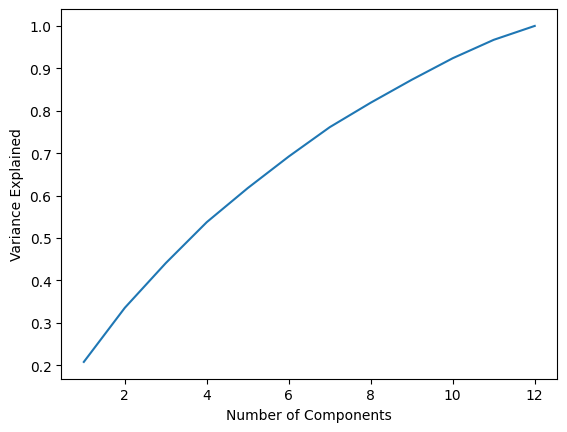

In [2002]:
plt.plot(range(1,13),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

In [2003]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(scaled_X_train)
X_test_pca = pca.transform(scaled_X_test)

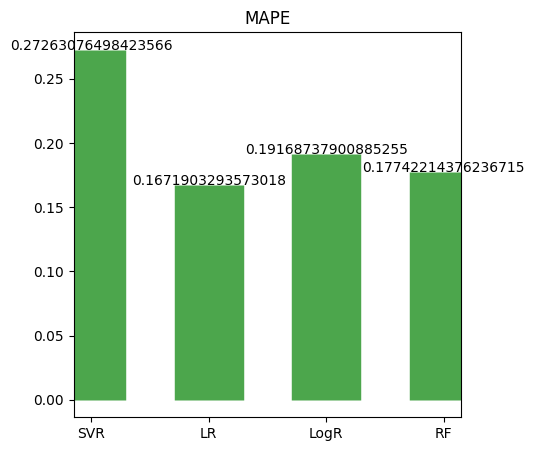

In [2004]:
# Метод опорных векторов 
svr= SVR()
svr.fit(X_train_pca, y_train)
svr_pred= svr.predict(X_test_pca)
svr_mape = mean_absolute_percentage_error(y_test, svr_pred) 


#  Линейная регрессия
lr = LinearRegression()
lr.fit(X_train_pca, y_train) 
ypred = lr.predict(X_test_pca)
lr_mape = mean_absolute_percentage_error(y_test, ypred)

#  Логистическая регрессия. 
logr = LogisticRegression()
logr.fit(X_train_pca, y_train)
ypred = logr.predict(X_test_pca)
logr_mape = mean_absolute_percentage_error(y_test, ypred)

# Случайный лес
RFreg = RandomForestRegressor(n_estimators=15,max_depth=7, random_state=30)
RFreg.fit(X_train_pca, y_train)
ypred=RFreg.predict(X_test_pca)
rf_mape = mean_absolute_percentage_error(y_test, ypred)

# создадим наборы данных для визуализации оценок  MAPE
data_mape = pd.DataFrame({'Model':['SVR', 'LR', 'LogR', 'RF'], 'MAPE':[svr_mape, lr_mape, logr_mape, rf_mape]}) 

# построим гистограмму для средней абсолютной процентной ошибки.
fig, ax = plot.subplots(figsize=(5,5))
ax.vlines(x=data_mape.Model, ymin=0, ymax=data_mape.MAPE, color='green', alpha=0.7, linewidth=50)
for i, MAPE in enumerate(data_mape.MAPE):
    ax.text(i, MAPE, MAPE, horizontalalignment='center')
ax.title.set_text('MAPE')

In [2005]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(scaled_X_train, y_train)
X_test_lda = lda.transform(scaled_X_test)



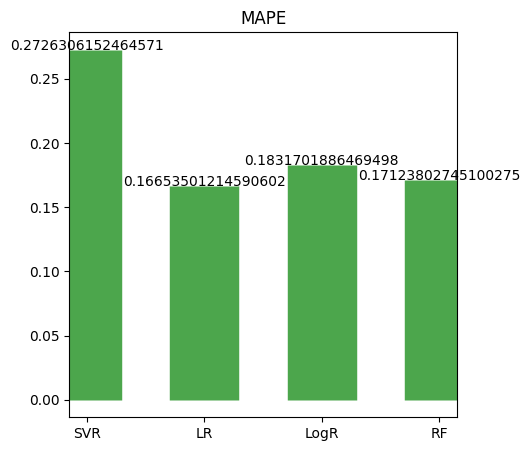

In [2006]:
logr_lda = LogisticRegression()
logr_lda.fit(X_train_lda, y_train)
logr_lda_pred = logr_lda.predict(X_test_lda)
logr_lda_mape=mean_absolute_percentage_error(y_test, logr_lda_pred)


RFreg = RandomForestRegressor(n_estimators=15,max_depth=7, random_state=30)
RFreg.fit(X_train_lda, y_train)
ypred=RFreg.predict(X_test_lda)

RFreg_mape=mean_absolute_percentage_error(y_test, ypred)

lr = LinearRegression()
lr.fit(X_train_lda, y_train) 
ypred = lr.predict(X_test_lda)
lr_lda_mape=mean_absolute_percentage_error(y_test, ypred)

svr= SVR()

svr.fit(X_train_lda, y_train)
svr_pred= svr.predict(X_test_lda)
svr_mape=mean_absolute_percentage_error(y_test, svr_pred)


# создадим наборы данных для визуализации оценок  MAPE
data_mape = pd.DataFrame({'Model':['SVR', 'LR', 'LogR', 'RF'], 'MAPE':[svr_mape, lr_lda_mape, logr_lda_mape, RFreg_mape]}) 

# построим гистограмму для средней абсолютной процентной ошибки.
fig, ax = plot.subplots(figsize=(5,5))
ax.vlines(x=data_mape.Model, ymin=0, ymax=data_mape.MAPE, color='green', alpha=0.7, linewidth=50)
for i, MAPE in enumerate(data_mape.MAPE):
    ax.text(i, MAPE, MAPE, horizontalalignment='center')
ax.title.set_text('MAPE')

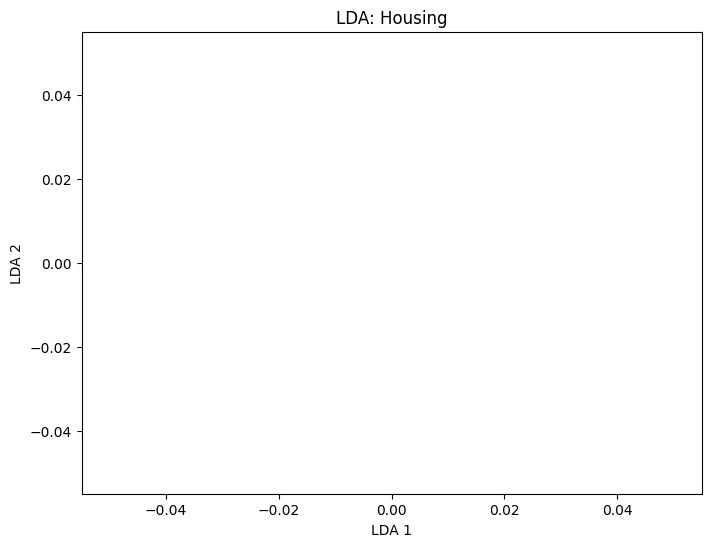

In [2007]:
plt.figure(figsize=(8, 6))
for label, marker, color in zip(range(3), ('^', 's', 'o'), ('red', 'green', 'blue')):
    plt.scatter(X_train_lda[y_train == label, 0],
                X_train_lda[y_train == label, 1],
                marker=marker, color=color)
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('LDA: Housing')
plt.show()

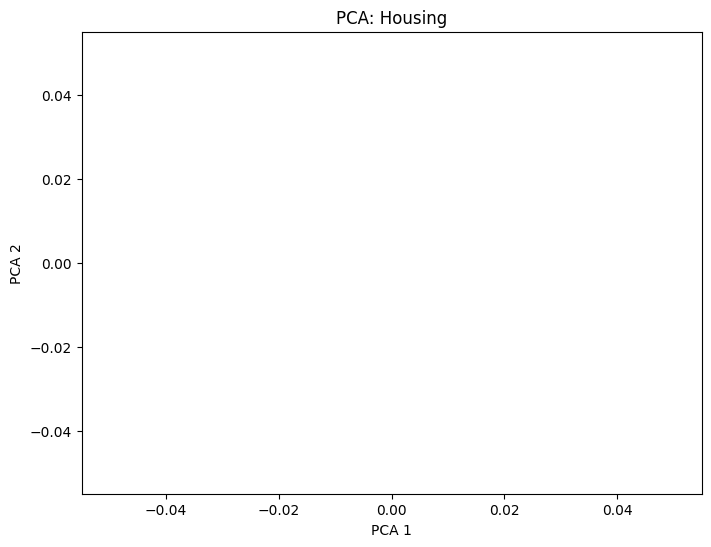

In [2008]:
plt.figure(figsize=(8, 6))
for label, marker, color in zip(range(3), ('^', 's', 'o'), ('red', 'green', 'blue')):
    plt.scatter(X_train_pca[y_train == label, 0],
                X_train_pca[y_train == label, 1],
                marker=marker, color=color)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA: Housing')
plt.show()

## Классификационная задача

In [2009]:

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [2010]:
# создаем объект класса StandardScaler
scaler = StandardScaler()
 
# приведем данные к единому масштабу 
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train_valid = scaler.fit_transform(X_train_valid)
scaled_X_test_valid=scaler.transform(X_test_valid)


#### PCA

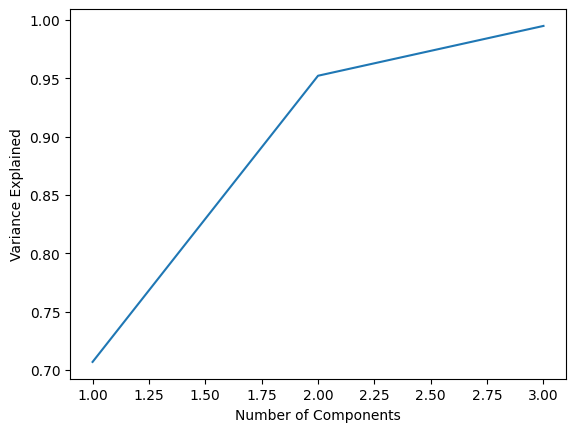

In [2011]:
explained_variance = []

for n in range(1,4):
    pca = PCA(n_components=n)
    pca.fit(scaled_X_train)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.plot(range(1,4),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

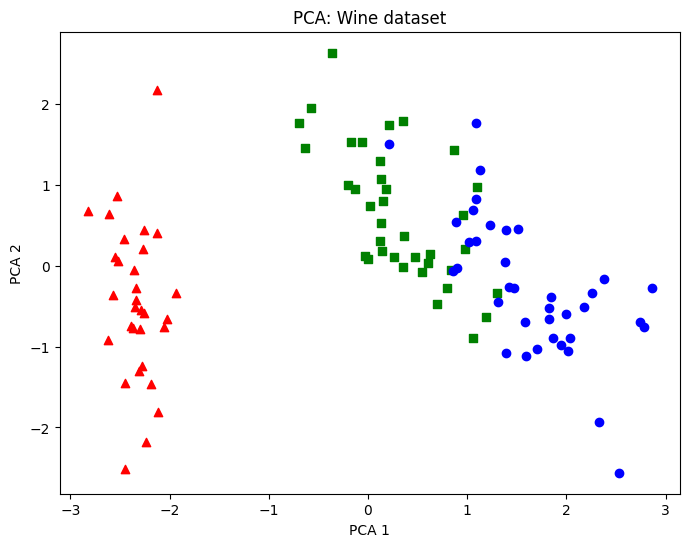

In [2012]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(scaled_X_train)
X_test_pca = pca.transform(scaled_X_test)



plt.figure(figsize=(8, 6))
for label, marker, color in zip(range(3), ('^', 's', 'o'), ('red', 'green', 'blue')):
    plt.scatter(X_train_pca[y_train == label, 0],
                X_train_pca[y_train == label, 1],
                marker=marker, color=color)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA: Wine dataset')
plt.show()


In [2013]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
print(f"PCA-based Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_pca):.2f}")


PCA-based Logistic Regression Accuracy: 0.91


In [2014]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(scaled_X_train_valid)
X_test_pca = pca.transform(scaled_X_test_valid)

lr_pca.fit(X_train_pca, y_train_valid)
y_pred_pca = lr_pca.predict(X_test_pca)
print(f"Validation Logistic Regression Accuracy: {accuracy_score(y_test_valid, y_pred_pca):.2f}")

Validation Logistic Regression Accuracy: 0.91


#### LDA

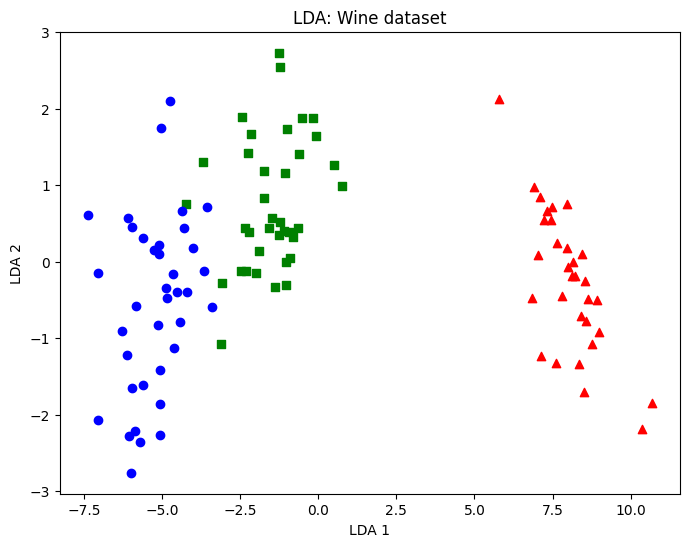

In [2015]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(scaled_X_train, y_train)
X_test_lda = lda.transform(scaled_X_test)

plt.figure(figsize=(8, 6))
for label, marker, color in zip(range(3), ('^', 's', 'o'), ('red', 'green', 'blue')):
    plt.scatter(X_train_lda[y_train == label, 0],
                X_train_lda[y_train == label, 1],
                marker=marker, color=color)
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('LDA: Wine dataset')
plt.show()


In [2016]:
lr = LogisticRegression()
lr.fit(X_train_lda, y_train)
y_pred = lr.predict(X_test_lda)
print(f"LDA-based Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2f}")



LDA-based Logistic Regression Accuracy: 1.00


In [2017]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(scaled_X_train_valid, y_train_valid)
X_test_lda = lda.transform(scaled_X_test_valid)

In [2018]:
lr = LogisticRegression()
lr.fit(X_train_lda, y_train_valid)
y_pred = lr.predict(X_test_lda)
print(f"LDA-based Logistic Regression Accuracy: {accuracy_score(y_test_valid, y_pred):.2f}")

LDA-based Logistic Regression Accuracy: 0.94


______________

## Задача кластеризации

**Набор данных о раке молочной железы в Висконсине (диагностический).**

Предсказать, является ли рак доброкачественным или злокачественным
Атрибуты:

Дополнительная информация
1) ID number
2) Diagnosis (M = malignant, B = benign)
   
Для каждого клеточного ядра вычисляется десять вещественных признаков:

    ** a) radius (mean of distances from center to points on the perimeter)
       b) texture (standard deviation of gray-scale values)
       c) perimeter
       d) area
       e) smoothness (local variation in radius lengths)
       f) compactness (perimeter^2 / area - 1.0)
       g) concavity (severity of concave portions of the contour)
       h) concave points (number of concave portions of the contour)
       i) symmetry 
       j) fractal dimension ("coastline approximation" - 1)**


 The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.


In [2019]:
df = pd.read_csv('cancer_tumor_data_features.csv')

In [2020]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2021]:
df.shape

(569, 30)

In [2022]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Масштабирование данных

In [2023]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### PCA

In [2024]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_X)

Text(0, 0.5, 'Second Principal Component')

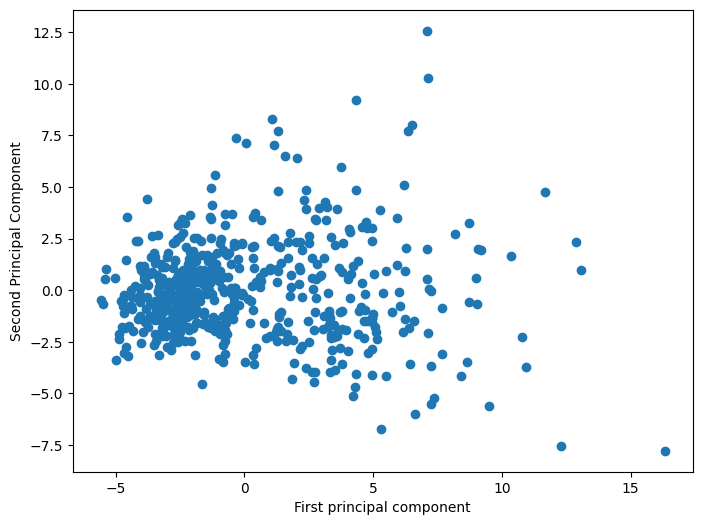

In [2025]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [2026]:
df_comp = pd.DataFrame(pca.components_,index=['PC1','PC2'],columns=df.columns)
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


In [2027]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [2028]:
np.sum(pca.explained_variance_ratio_)

0.6324320765155949

In [2029]:
explained_variance = []

for n in range(1,30):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

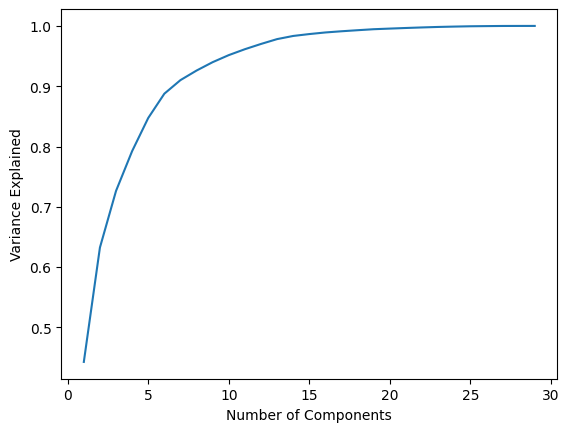

In [2030]:
plt.plot(range(1,30),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

In [2031]:
pca6 = PCA(n_components=6)
principal_components6 = pca6.fit_transform(scaled_X)

In [2032]:
df_comp = pd.DataFrame(pca6.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6'],columns=df.columns)
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
PC3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
PC4,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
PC5,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
PC6,0.018741,-0.032179,0.017308,-0.001888,-0.286375,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224


In [2033]:
np.sum(pca6.explained_variance_ratio_)

0.8875879635667886

In [2034]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouettes=[]

for k in range(2,10):
    model=KMeans(n_clusters=k)
    model.fit(principal_components)
    silhouettes.append(silhouette_score(principal_components,model.labels_))
    
silhouettes

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

[0.508469019067238,
 0.47667244607322506,
 0.46538187355586097,
 0.36316440010638723,
 0.3554216583281709,
 0.365707758948378,
 0.3726497700382114,
 0.3405150327227162]

In [2035]:
pca = PCA(n_components=6)
principal_components = pca.fit_transform(scaled_X)
model=KMeans(n_clusters=6)
model.fit(principal_components)
silhouette_score(principal_components,model.labels_)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.19604314750960233

In [2036]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_X)
model=KMeans(n_clusters=2)
model.fit(principal_components)
silhouette_score(principal_components,model.labels_)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5084690190665987

In [2038]:
from tqdm import tqdm
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_X)

best_score = -100

# Список для хранения силуэтных коэффициентов
silhouette_coefficients = {}

# Начинаем с минимума 2 кластеров, так как для одного кластера силуэтный коэффициент не определен
for j in tqdm(range(2,30)):
    for k in range(2,100,1):
        epsilon = k/100
        dbscan = DBSCAN(eps=epsilon, min_samples=j)
        clusters = dbscan.fit_predict(principal_components)
        try:
            score = silhouette_score(principal_components, clusters)
            silhouette_coefficients[epsilon] = {j,score}
        except:
            continue
        if score > best_score:
            best_score = score
            best_params = {j,best_score,epsilon}
            

  0%|          | 0/28 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:25<00:00,  1.08it/s]


In [2039]:
best_params

{0.5014892873247959, 0.94, 4}

In [2040]:
from tqdm import tqdm
pca = PCA(n_components=6)
principal_components = pca.fit_transform(scaled_X)

best_score = -100

# Список для хранения силуэтных коэффициентов
silhouette_coefficients = {}

# Начинаем с минимума 2 кластеров, так как для одного кластера силуэтный коэффициент не определен
for j in tqdm(range(2,30)):
    for k in range(2,100,1):
        epsilon = k/100
        dbscan = DBSCAN(eps=epsilon, min_samples=j)
        clusters = dbscan.fit_predict(principal_components)
        try:
            score = silhouette_score(principal_components, clusters)
            silhouette_coefficients[epsilon] = {j,score}
        except:
            continue
        if score > best_score:
            best_score = score
            best_params = {j,best_score,epsilon}

  0%|          | 0/28 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:19<00:00,  1.43it/s]


In [2041]:
best_params

{-0.18547678798824868, 0.51, 3}

### LDA

In [2042]:

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(scaled_X_train, y_train)
X_test_lda = lda.transform(scaled_X_test)

In [2044]:
silhouettes=[]

for k in range(2,10):
    model=KMeans(n_clusters=k)
    model.fit(X_train_lda)
    silhouettes.append(silhouette_score(X_train_lda,model.labels_))
    
silhouettes

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

[0.7676461313554563,
 0.6416735180558744,
 0.5762228584687813,
 0.45041648608254387,
 0.3978056767654343,
 0.40049767151779836,
 0.4128450279299848,
 0.42654719880271613]

In [2049]:
model=KMeans(n_clusters=2)
model.fit(X_train_lda)
silhouette_score(X_train_lda,model.labels_)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7676461313554563

In [2050]:
model=KMeans(n_clusters=2)
model.fit(X_test_lda)
silhouette_score(X_test_lda,model.labels_)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7861207179033338

In [2052]:
from tqdm import tqdm
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(scaled_X_train, y_train)
X_test_lda = lda.transform(scaled_X_test)

best_score = -100

# Список для хранения силуэтных коэффициентов
silhouette_coefficients = {}

# Начинаем с минимума 2 кластеров, так как для одного кластера силуэтный коэффициент не определен
for j in tqdm(range(2,30)):
    for k in range(2,100,1):
        epsilon = k/100
        dbscan = DBSCAN(eps=epsilon, min_samples=j)
        clusters = dbscan.fit_predict(X_train_lda)
        try:
            score = silhouette_score(X_train_lda, clusters)
            silhouette_coefficients[epsilon] = {j,score}
        except:
            continue
        if score > best_score:
            best_score = score
            best_params = {j,best_score,epsilon}

100%|██████████| 28/28 [00:05<00:00,  5.59it/s]


In [2053]:
best_params

{0.5808621652707211, 0.84, 3}

In [2054]:
from tqdm import tqdm
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(scaled_X_train, y_train)
X_test_lda = lda.transform(scaled_X_test)

best_score = -100

# Список для хранения силуэтных коэффициентов
silhouette_coefficients = {}

# Начинаем с минимума 2 кластеров, так как для одного кластера силуэтный коэффициент не определен
for j in tqdm(range(2,30)):
    for k in range(2,100,1):
        epsilon = k/100
        dbscan = DBSCAN(eps=epsilon, min_samples=j)
        clusters = dbscan.fit_predict(X_test_lda)
        try:
            score = silhouette_score(X_test_lda, clusters)
            silhouette_coefficients[epsilon] = {j,score}
        except:
            continue
        if score > best_score:
            best_score = score
            best_params = {j,best_score,epsilon}

100%|██████████| 28/28 [00:03<00:00,  7.17it/s]


In [2055]:
best_params

{0.731954454489491, 0.9, 6}